# Problem Statement
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [14]:
# import all the required librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
#Importing the required library for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv") # loading mydataframe into df variable
df.head()#view my first 5 records

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The column names which shows above has no any meanings,so converted all as shown below

In [17]:
new_column_list = ["Wins","Runs","At Bats","Hits","Doubles","Triples","Homeruns","Walks","Strikeouts","Stolen Bases","Runs Allowed","Earned Runs","Earned Run Average (ERA)","Shutouts","Saves","Complete Games","Errors",]

In [18]:
df.set_axis(new_column_list,axis=1,inplace=True)#replaced column name with new name from list

In [19]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'Shutouts', 'Saves', 'Complete Games',
       'Errors'],
      dtype='object')

In [20]:
df.describe()#statisical descripton for my dataframe here I see some columns has outliers which will be treated later on

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [21]:
df.info()  #info of my dataframe which says if any null values along with datatype here all are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Shutouts                  30 non-null     int64  
 14  Saves       

# EDA
Checking for Null values present in my dataframe

In [22]:
df.isnull()  #checking null values

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum() #count of my nullvalues

Wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Shutouts                    0
Saves                       0
Complete Games              0
Errors                      0
dtype: int64

<AxesSubplot:>

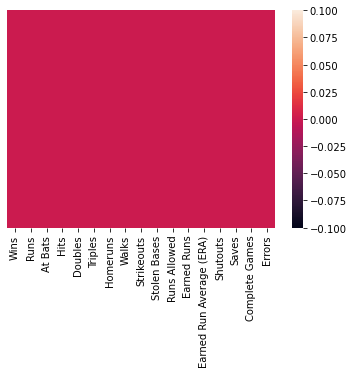

In [24]:
sns.heatmap(df.isnull(),yticklabels=False)   #visualising null values if any

I see no null values here and there are no classification features in my dataset so lets check for outliers by using distplot and boxplot as below for all my columns

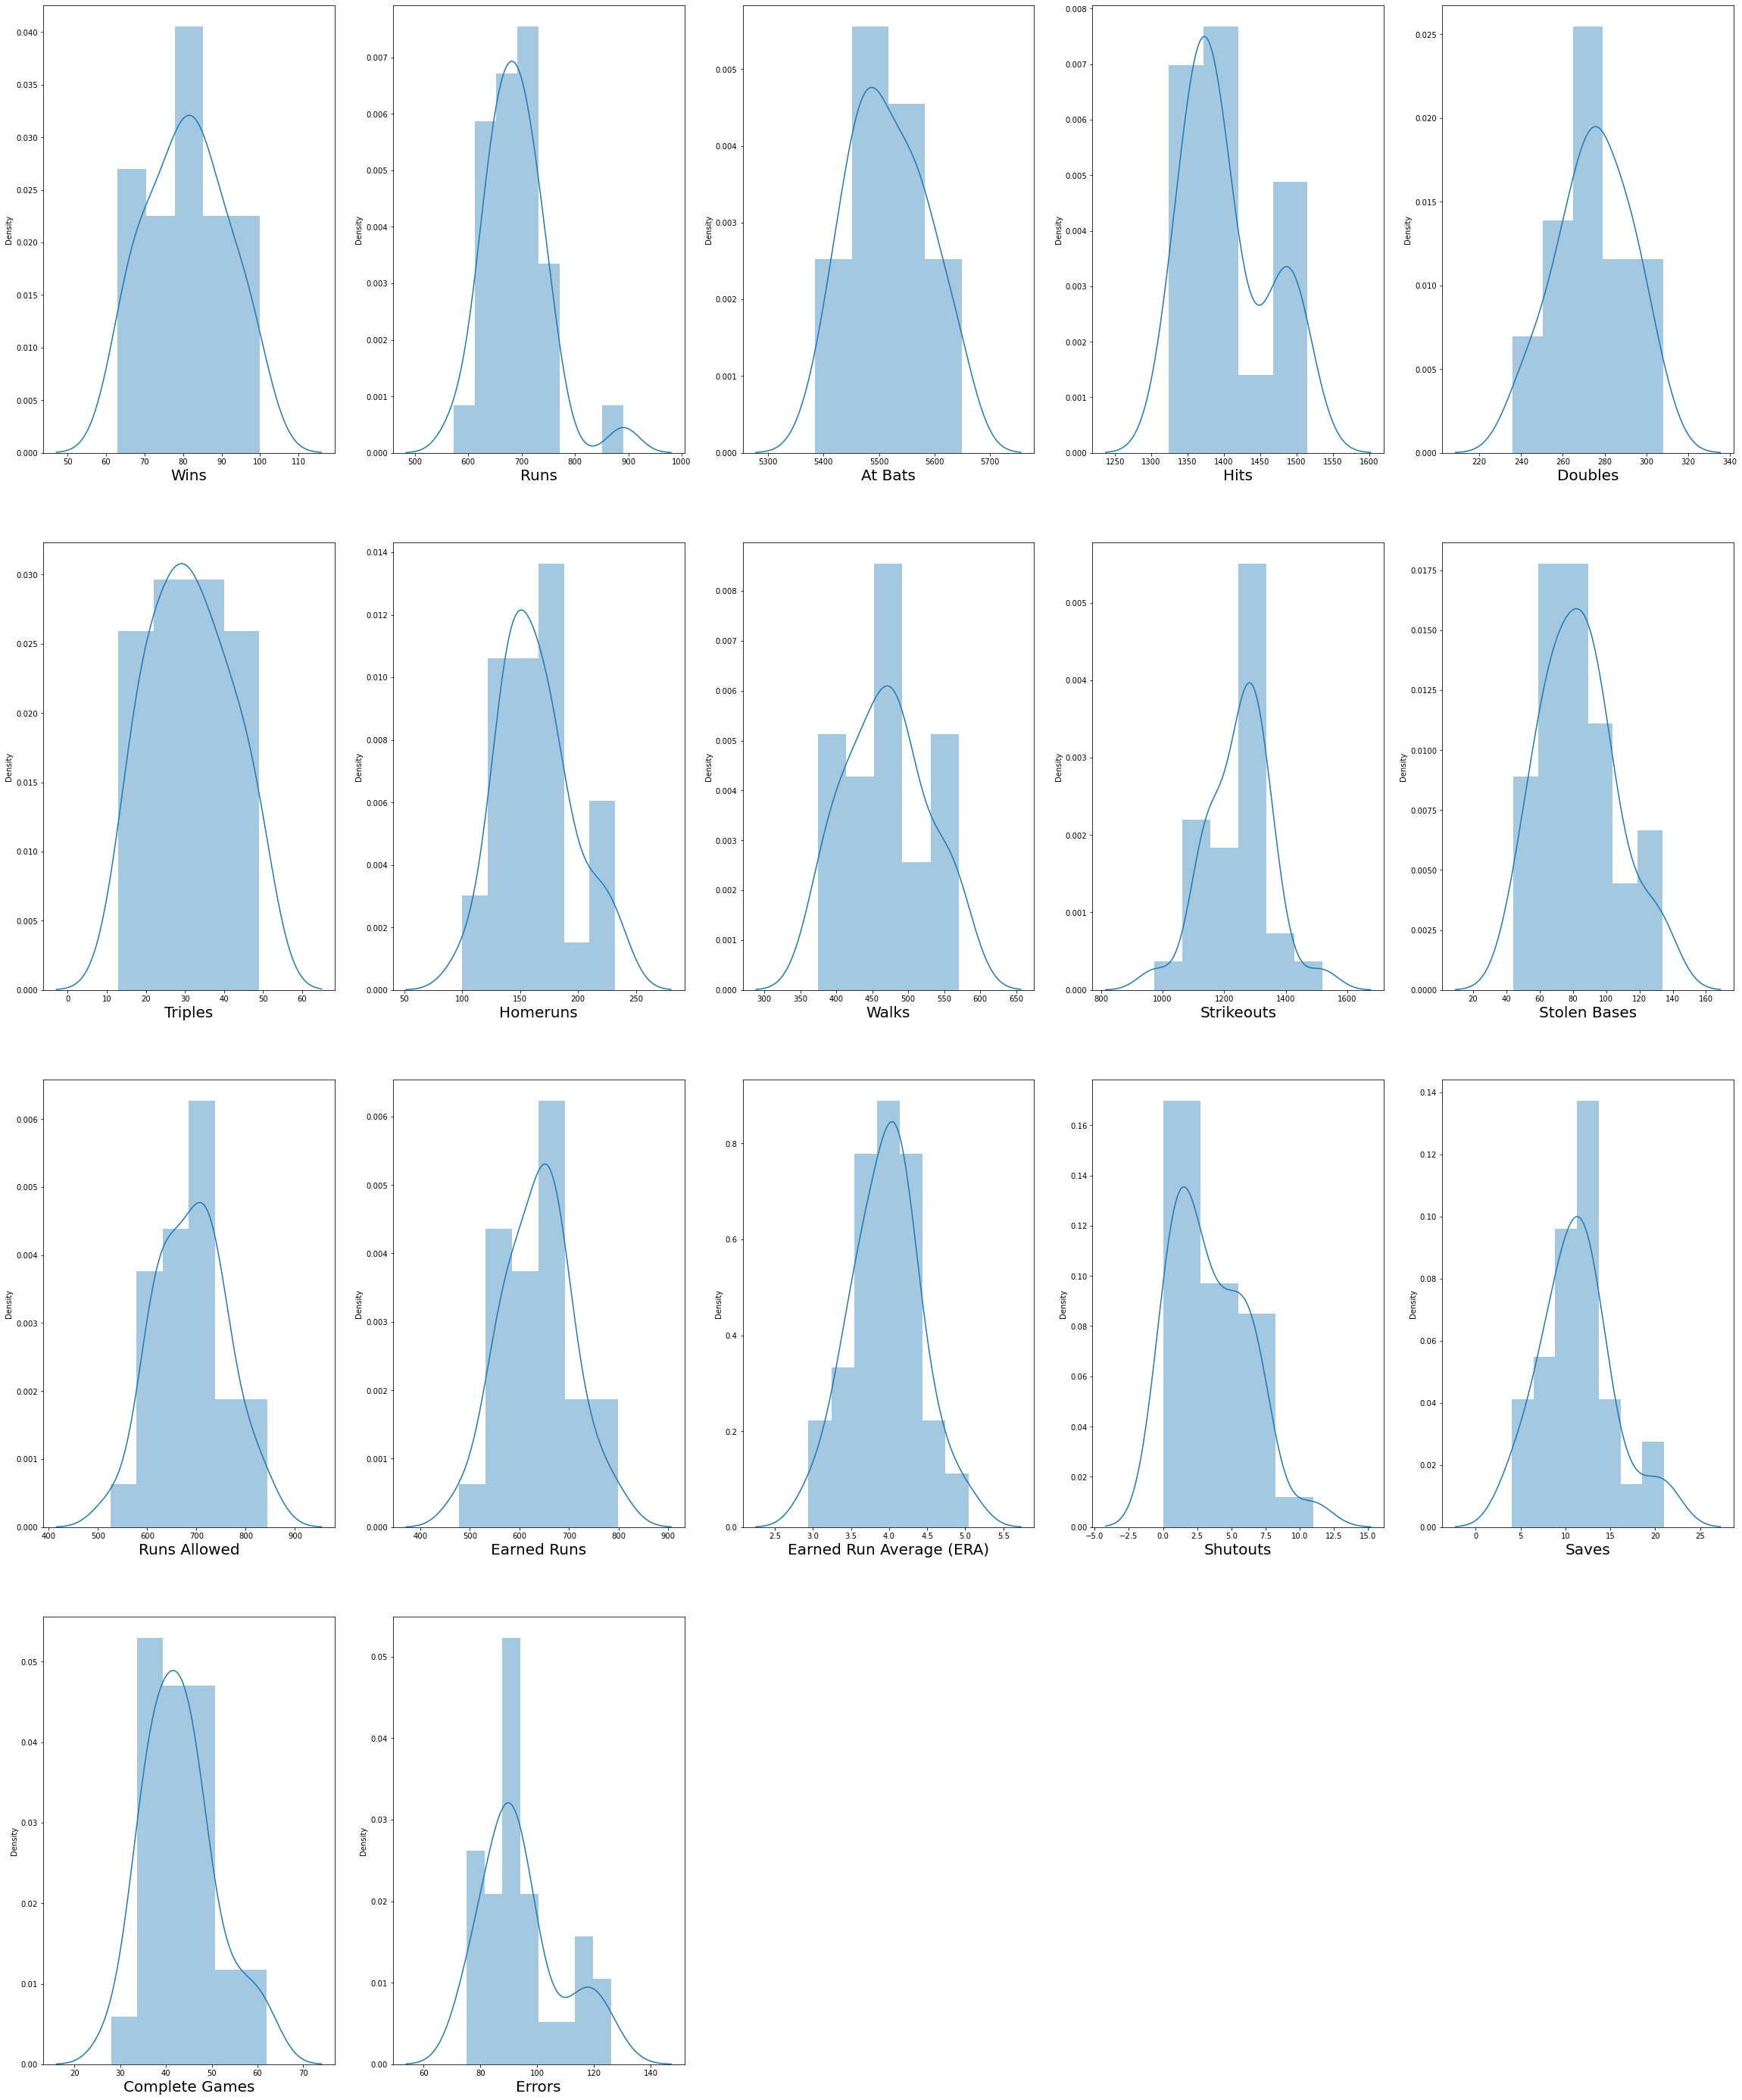

In [25]:
plt.figure(figsize=(40,50),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
            ax = plt.subplot(4,5,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

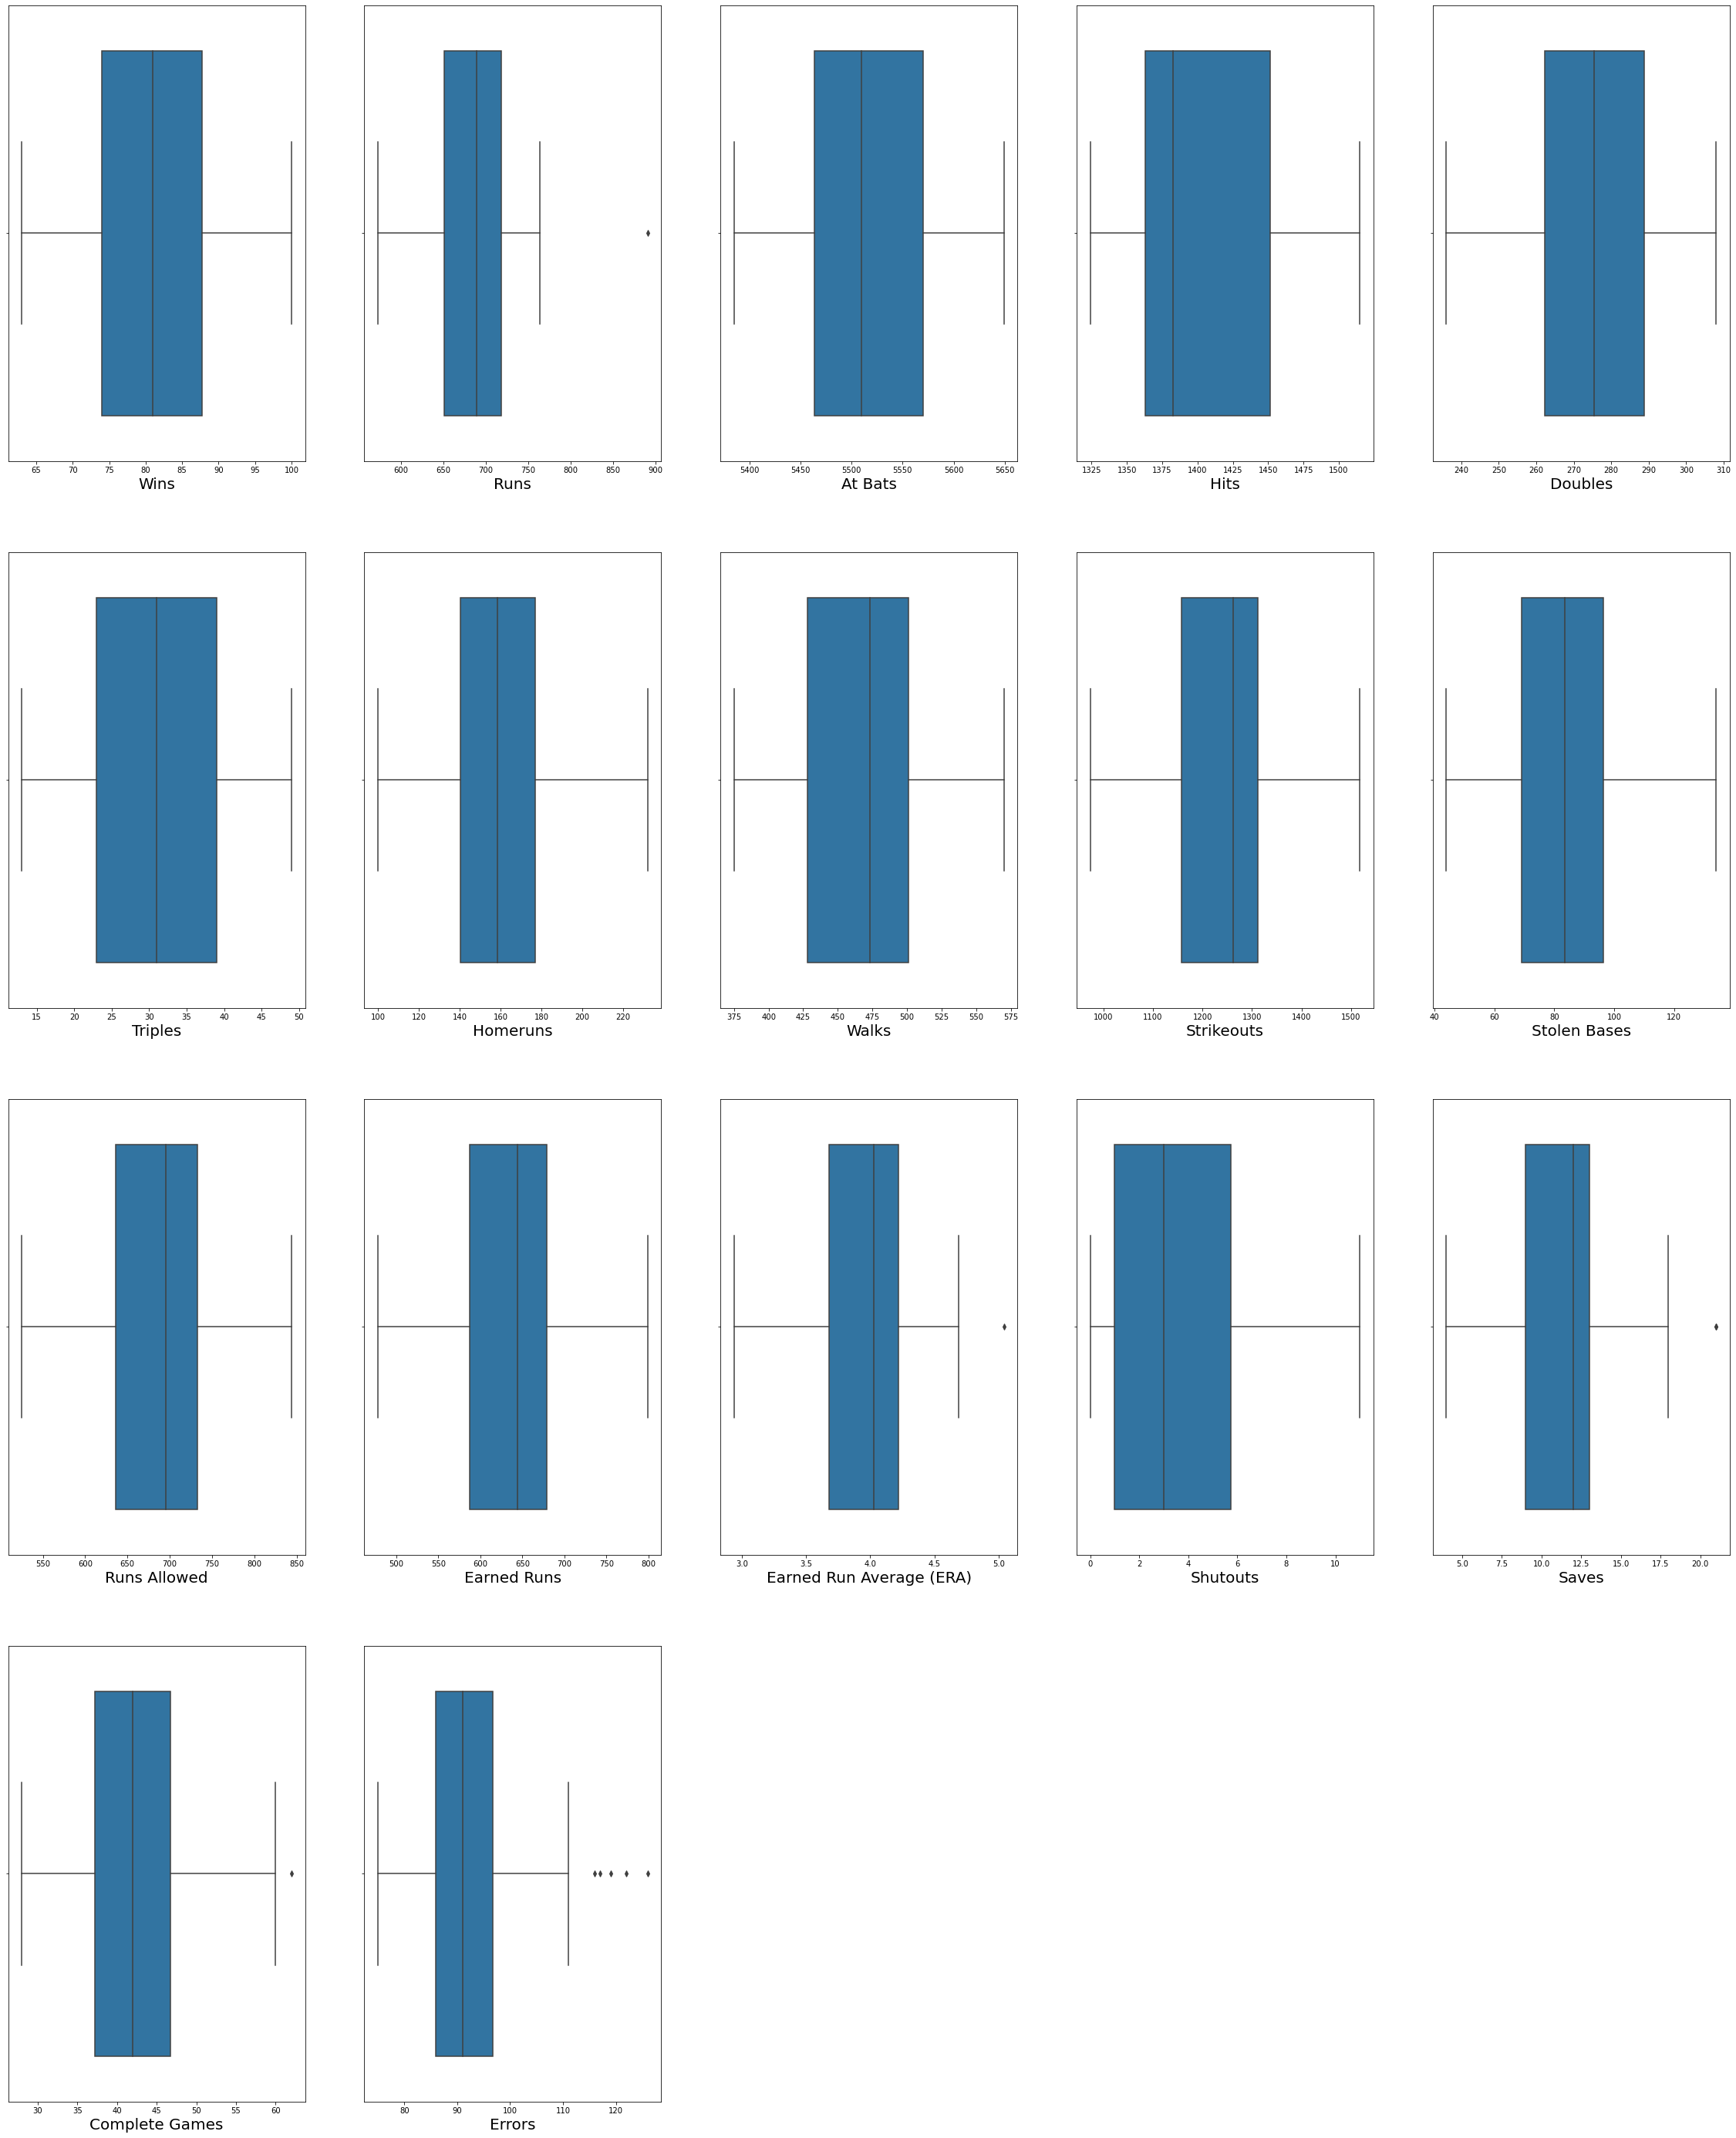

In [26]:
plt.figure(figsize=(40,50),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
            ax = plt.subplot(4,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [27]:
#checking for Z score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

print(z)

        Wins      Runs   At Bats      Hits   Doubles   Triples  Homeruns  \
0   1.365409  0.619078  0.847731  1.663685  1.420173  1.041193  0.787299   
1   0.197838  0.134432  0.711094  0.970681  0.127403  1.235809  0.243967   
2   0.003243  0.332906  1.115233  0.151891  1.588795  0.223808  0.723377   
3   0.483244  1.146419  0.241522  0.401088  0.828122  0.418423  0.883181   
4   0.677839  0.013270  1.280738  1.984081  0.801892  1.722347  0.403770   
5   1.170814  3.509647  0.104884  1.361089  1.869832  1.391501  2.185047   
6   0.587028  1.311430  0.732263  0.116292  0.153633  1.196885  1.545833   
7   0.003243  0.428681  0.451289  0.596886  1.615025  1.099578  1.705636   
8   0.094054  0.765626  0.451289  0.365489  0.183611  0.068115  0.107601   
9   0.288649  1.034489  1.785913  1.628086  1.082929  0.165423  0.084163   
10  0.684326  1.086415  0.076017  0.275303  0.239818  0.068115  0.267405   
11  0.489731  0.705622  0.826562  0.721484  0.183611  0.515731  2.121125   
12  0.392433

In [28]:
index = (np.where(z>4)[0])

In [29]:
df = df.drop(df.index[index])

In [30]:
df.shape

(30, 17)

Basically my z-score did not remove any records based on the criteria given here. I decided not go remove any record as we have less obeservation here.

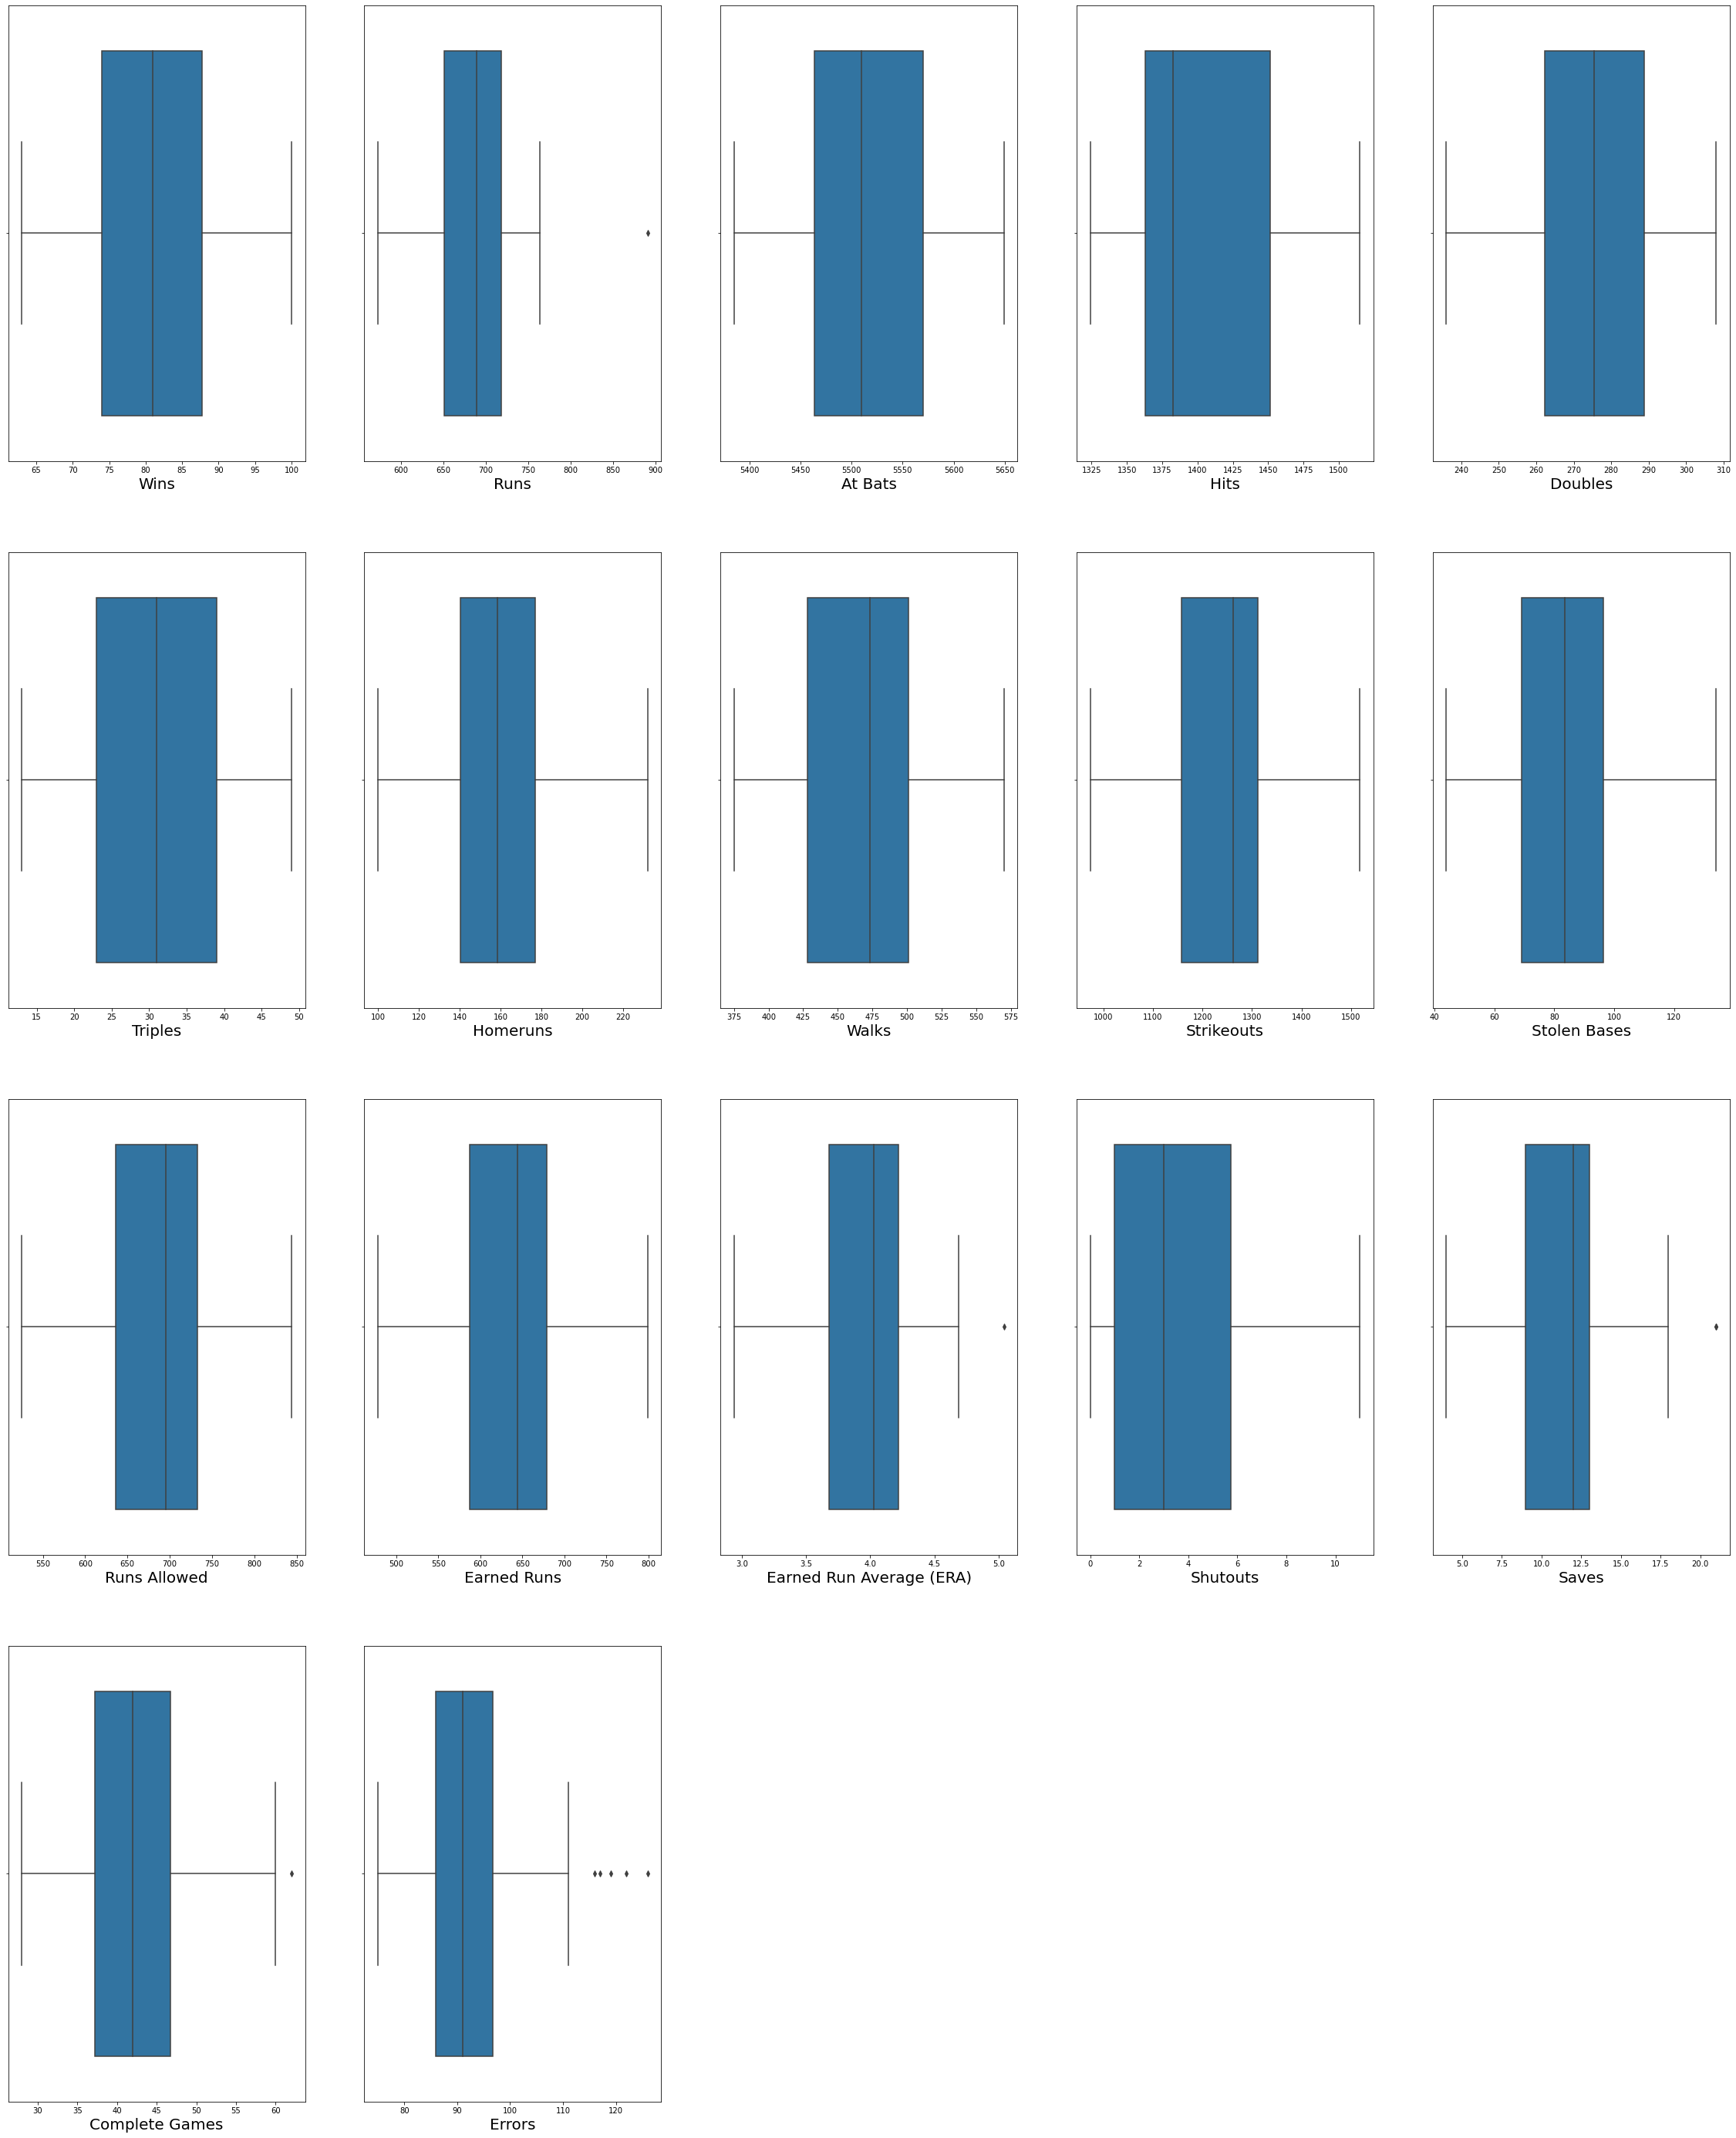

In [31]:
#plots post outlier removal
plt.figure(figsize=(40,50),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=17:
            ax = plt.subplot(4,5,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [32]:
#checking correlation for between my features
corr_mat = df.corr()
corr_mat

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Complete Games,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<function matplotlib.pyplot.show(close=None, block=None)>

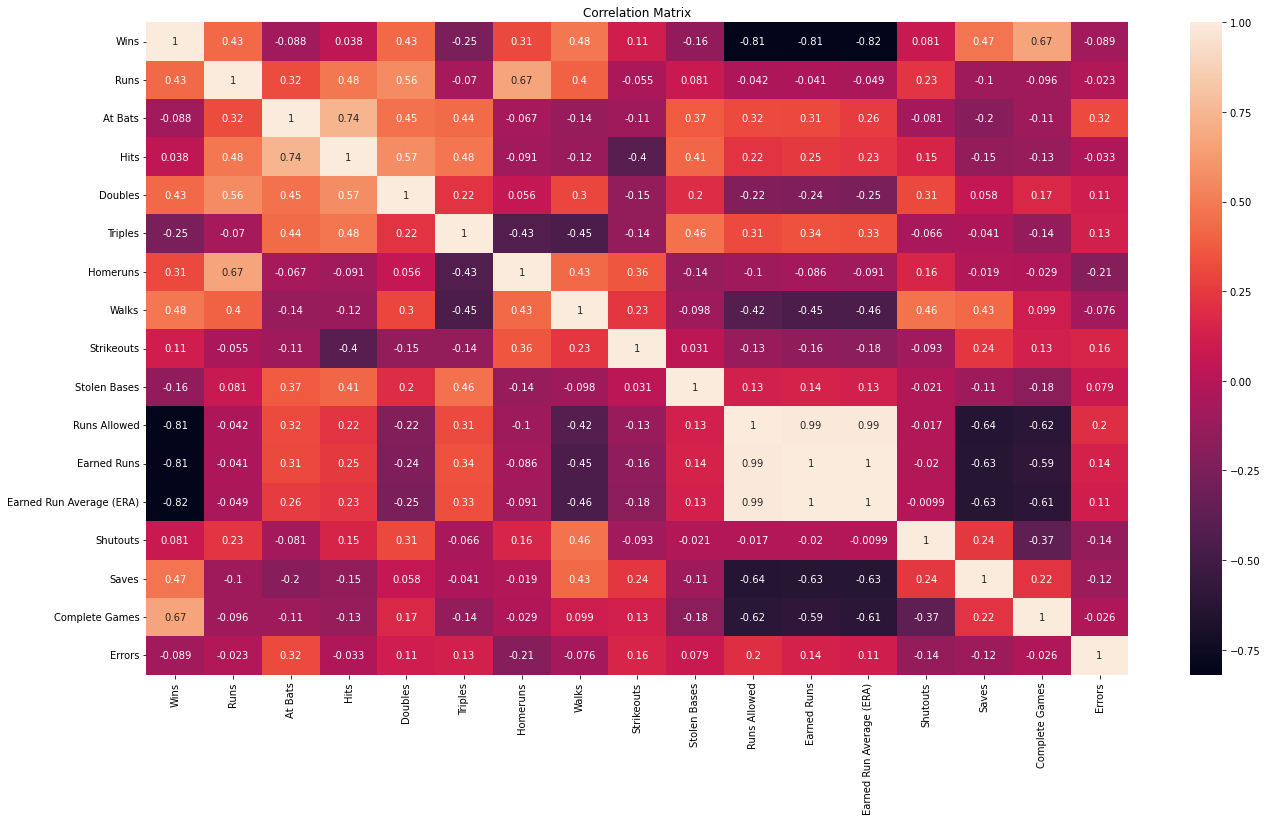

In [36]:
#Visualising heatmap for corr_mat. 
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

In [37]:
# Seprating my features and labels
X = df.drop(['Wins'], axis = 1)
y = df['Wins']

In [38]:
# Scaling my features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [39]:
# Splitting my train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33,random_state=253)

In [40]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train , y_train)
pred = lr.predict(X_test)

In [41]:
  # Metrics for my linear regression
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [42]:
  # Printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 6.349390851580682
The r2-score is: 0.47259596826090455


In [43]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred1 = DT.predict(X_test) #Predict  

In [44]:
 # Metrics for my decision tree
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2_1 = r2_score(y_test, y_pred1)

In [45]:
# printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 13.971399357258385
The r2-score is: -1.553636839351125


In [46]:
# using Decision tree random forest to my dataset
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor() #Instantiate the LogisticRegression object
rf.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred2 = rf.predict(X_test) #Predict  

In [47]:
#metrics for random forest
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
r2_2 = r2_score(y_test, y_pred2)

In [48]:
#printing my metrics
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 6.319203272565301
The r2-score is: 0.4775990319204604


In [49]:
# using adaboost  regressor to my dataset
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor() #Instantiate the LogisticRegression object
ab.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred3 = ab.predict(X_test) #Predict  

In [50]:
#metrics for my adaboost model
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
r2_3 = r2_score(y_test, y_pred3)

In [51]:
#printing my scores
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 5.760113195224022
The r2-score is: 0.5659484036918643


In [52]:
# using bagging  regressor to my dataset
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor() #Instantiate the LogisticRegression object
bg.fit(X_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred4 = bg.predict(X_test) #Predict  

In [53]:
#metrics for my bagging model
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
r2_4  = r2_score(y_test, y_pred4)

In [54]:
#score for my metrics to be printed
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 6.328190894718646
The r2-score is: 0.4761119832548406


# This dataset changes r2 score and rmse score for my each run and i have decided not to use any hyperparameter tuning for the same as it will change my current accuracy which is in best currently and the same has been saved in pkl file

In [63]:
# Saving the model in pkl file
import joblib
joblib.dump(ab,"Baseball_Prediction.pkl")

model = joblib.load("Baseball_Prediction.pkl")

#Predicting the saved model
prediction = model.predict(X_test)

#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)